<a href="https://colab.research.google.com/github/lywgit/rlbook-hands-on/blob/main/01_gymnasium_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 gym basics

- Use [gymnasium](https://gymnasium.farama.org/) instead of gym

In [1]:
!pip install gymnasium
!pip install ale-py

In [2]:
import gymnasium as gym
import ale_py
gym.register_envs(ale_py)
# gym.pprint_registry()

## environment

- an environment instance knows its observaion space and action space
- an environment instance can take a step forward upon receiving your input action and feedback on your obtained reward
- it also knows if the game is done

In [3]:
from pprint import pprint
import gymnasium as gym

SEED = 42

# initialize environment
env = gym.make('CartPole-v1')

print('-- env --' )
print(env)

print('-- env.observation_space --')
print(env.observation_space)

print('-- env.action_space --')
print(env.action_space)
if isinstance(env.action_space, gym.spaces.discrete.Discrete):
    print(' n =', env.action_space.n)
    print(' start =', env.action_space.start)


# first observation
observation, info = env.reset(seed=SEED)
print('-- (first observation before any action) -- ')
print('-- observation --')
print(observation)
print('-- info --')
print(info)

# choose an action at random
action = env.action_space.sample()
print('-- a random action')
print(action)

# a step forward
observation, reward, terminated, truncated, info = env.step(action)
print('-- (after a step) --')
print('-- observation --')
print(observation)
print('-- reward --')
print(reward)
print('-- terminated --')
print(terminated)
print('-- truncated --')
print(truncated)
print('-- info --')
print(info)


-- env --
<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>
-- env.observation_space --
Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
-- env.action_space --
Discrete(2)
 n = 2
 start = 0
-- (first observation before any action) -- 
-- observation --
[ 0.0273956  -0.00611216  0.03585979  0.0197368 ]
-- info --
{}
-- a random action
0
-- (after a step) --
-- observation --
[ 0.02727336 -0.20172954  0.03625453  0.32351476]
-- reward --
1.0
-- terminated --
False
-- truncated --
False
-- info --
{}


## wrappers
- There is a long list of predefined wrappers under `gymnasium.wrappers`:
    - ex: `NumpyToTorch, RescaleAction` etc
- To [implement custom wrapper](https://gymnasium.farama.org/tutorials/gymnasium_basics/implementing_custom_wrappers/), inherit from these classes:
    - `Wrapper, ActionWrapper, ObservationWrapper, RewardWrapper`


In [4]:
import gymnasium as gym
from gymnasium.wrappers import NumpyToTorch, RescaleAction
from gymnasium import Wrapper, ActionWrapper, ObservationWrapper, RewardWrapper

# to see the
env = gym.make('CartPole-v1')
print('current env (can be a wrapper):', env)
print('the env wrapped by current env:', env.env)
print('the env underneeth all wrappers:', env.unwrapped)
# print(env.unwrapped.env)


current env (can be a wrapper): <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>
the env wrapped by current env: <OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>
the env underneeth all wrappers: <CartPoleEnv<CartPole-v1>>


## ActionWrapper example

In [5]:
from gymnasium import ActionWrapper

class RandomActionWrapper(ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super().__init__(env)
        self.epsilon = epsilon
        self.action_space = gym.spaces.discrete.Discrete(n=2)
        # should also specify the correct overwridden action, here the same so not necessary

    def action(self, action): # override
        if self.env.np_random.uniform() < self.epsilon:
            action = self.env.action_space.sample()
            print(f'(random!) {action}', end=', ')
        else:
            print(action, end=', ')
        return action

env = gym.make('CartPole-v1')
env = RandomActionWrapper(env) # wrap the env

fixed_action = 0
observation, _ = env.reset()
for _ in range(100):
    observation, reward, terminated, truncated, info = env.step(fixed_action)
    # although always pass in a fixed_action, the ActionWrapper can override this behaviour
    if terminated or truncated:
        observation, _ = env.reset()
env.close()



0, 0, 0, 0, 0, 0, 0, (random!) 0, 0, 0, 0, 0, 0, 0, 0, 0, (random!) 1, 0, 0, 0, 0, 0, 0, (random!) 1, 0, (random!) 0, 0, 0, 0, 0, 0, (random!) 0, (random!) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (random!) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (random!) 1, 0, 0, 0, 0, (random!) 0, 0, (random!) 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (random!) 1, 

## Quick visualization


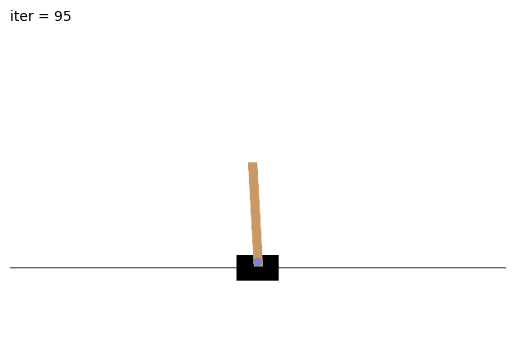

In [6]:
# continuousely clear output and then display image
# the results flickers but is straightforward
# Modified from: https://stackoverflow.com/a/72450538/4632195

import os
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output

env = gym.make("CartPole-v1", render_mode='rgb_array')
observation, info = env.reset()

for i in range(100):
    observation, reward, turminated, truncated, info = env.step(env.action_space.sample())

    if turminated or truncated:
        observation, info = env.reset()

    if i % 5 == 0:
        clear_output(wait=True)
        img = env.render()
        plt.imshow(img)
        # optionaly remove grid and ticks, and add some info
        plt.axis('off')
        plt.text(0, 0, f"iter = {i}")
        plt.show()

env.close()

## Recording and displaying video
- gymnasium doc: [record agent](https://gymnasium.farama.org/introduction/record_agent/)
- display video with moviepy: https://stackoverflow.com/a/75872378/4632195


In [7]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

num_eval_episodes = 4

env = gym.make("CartPole-v1", render_mode="rgb_array")  # replace with your environment
env = RecordVideo(env, video_folder="cartpole-agent", name_prefix="eval",
                  episode_trigger=lambda x: True)
env = RecordEpisodeStatistics(env, buffer_length=num_eval_episodes)

for episode_num in range(num_eval_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated
env.close()

print(f'Episode time taken: {env.time_queue}')
print(f'Episode total rewards: {env.return_queue}')
print(f'Episode lengths: {env.length_queue}')

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/cartpole-agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Episode time taken: deque([0.141163, 0.178552, 0.065667, 0.103184], maxlen=4)
Episode total rewards: deque([18.0, 34.0, 14.0, 24.0], maxlen=4)
Episode lengths: deque([18, 34, 14, 24], maxlen=4)


In [8]:
# play video in colab
import moviepy.editor
moviepy.editor.ipython_display("cartpole-agent/eval-episode-0.mp4")